## Project II - Regression Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'low fat', 'Regular', 'reg'],['LF','LF','REG','REG'])

In [4]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [5]:
avg = df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=avg, inplace=True)

In [6]:
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [7]:
df = df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [8]:
df_real = pd.get_dummies(df, drop_first=True)
df_real

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_REG,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [10]:
X = df_real.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1,1)

In [11]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## 54

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
dt_regressor = DecisionTreeRegressor()

In [16]:
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [17]:
predicted = sc_y.inverse_transform(dt_regressor.predict(X_test))
predicted

array([4777.7808, 5369.0112, 4876.985 , ..., 1325.6078, 3588.662 ,
       1384.1982])

## 55

In [18]:
y_real = sc_y.inverse_transform(y_test)

In [19]:
from sklearn import metrics

In [20]:
print('MAE:', metrics.mean_absolute_error(y_real, predicted))
print('MSE:', metrics.mean_squared_error(y_real, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_real, predicted)))
print('R2:', metrics.r2_score(y_real, predicted))

MAE: 1132.967844340176
MSE: 2624506.7126743887
RMSE: 1620.0329356758118
R2: 0.11043356351745226


## 56

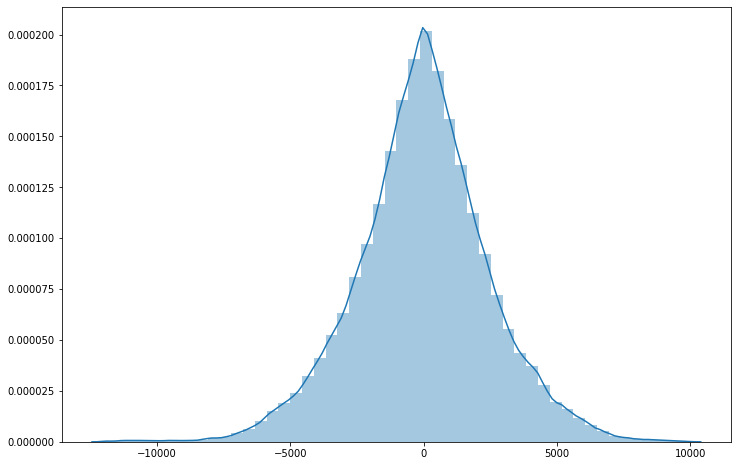

In [21]:
fig=plt.figure(figsize=(12,8))
sns.distplot((y_real-predicted), bins=50)

## 57

In [22]:
dict_compare = {'Sales': y_real.flatten(), 'Predicted': predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted

,Sales,Predicted
0,4426.2384,4777.7808
1,4845.0266,5369.0112
2,2293.0152,4876.9850
3,1065.2800,2334.9606
4,2345.6134,1438.1280
...,...,...
1700,3207.8244,3547.3824
1701,2263.7200,1543.3244
1702,1906.8512,1325.6078
1703,2773.0570,3588.6620


In [24]:
print(df_predicted.to_string())

           Sales     Predicted
0      4426.2384   4777.780800
1      4845.0266   5369.011200
2      2293.0152   4876.985000
3      1065.2800   2334.960600
4      2345.6134   1438.128000
5       322.2472    334.231600
6      1860.2452   2432.833200
7       209.7270    790.970400
8      4377.6350   4763.799000
9       322.9130   2002.060600
10      314.2576    792.302000
11       56.5930    163.786800
12     2407.5328   1029.992600
13     1647.8550   1921.498800
14     3560.6984   1752.385600
15      569.2590   2942.836000
16     4339.0186   1832.281600
17     2402.2064   1960.781000
18     4500.8080   2460.796800
19     4647.2840   4414.919800
20     2233.0932    601.217400
21     1603.9122   2157.192000
22     2763.0700   1757.712000
23     6239.8776   2836.308000
24      588.5672    713.737600
25     1565.9616   2906.217000
26     4175.8976   6002.852800
27     1631.2100   3866.966400
28     1539.9954   3115.944000
29      745.6960   1444.786000
30     3775.0860   2543.356000
31     1

## 58

In [23]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.575158
Predicted,0.575158,1.000000
